<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplolib inline

import warnings
warnings.filterwarnings('ignore')

# Plotly for interactive graphics 
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

from collections import Counter

UsageError: Line magic function `%matplolib` not found.


## Load and Prepare Data

In [2]:
df_orginal = pd.read_csv('Churn.csv')


df=df_orginal
dfl=df_orginal.copy()


df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [3]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
columns_name = list(df.columns)
columns_name.remove('Exited')
columns_name

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### Balancing Data with over sampling

In [7]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df[columns_name], df['Exited'])



print(sorted(Counter(y_resampled).items()))

[(0, 7963), (1, 7963)]


In [8]:
df = pd.DataFrame()
df[columns_name] = X_resampled
df['Exited'] = y_resampled 
print(df.shape)
df.head()

(15926, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
print(df.describe)

<bound method NDFrame.describe of        CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0              619    France  Female   42       2       0.00              1   
1              608     Spain  Female   41       1   83807.86              1   
2              502    France  Female   42       8  159660.80              3   
3              699    France  Female   39       1       0.00              2   
4              850     Spain  Female   43       2  125510.82              1   
...            ...       ...     ...  ...     ...        ...            ...   
15921          750    France  Female   37       6       0.00              1   
15922          692     Spain  Female   47       3       0.00              2   
15923          565   Germany    Male   52       5   97720.35              2   
15924          553     Spain  Female   48       3       0.00              1   
15925          492    France  Female   49       8       0.00              1   

       HasCrCard 

## Data Preprocessing

In [10]:
data_column_object = []
for column in df.columns:
    if df[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

['Geography', 'Gender']

In [11]:
def uni(columnname):
    print(columnname,"--" ,df[columnname].unique())

In [12]:
dataobject=df.select_dtypes(['object'])
len(dataobject.columns)

2

In [13]:
for item in data_column_object:
#     uni(dataobject.columns[1])
    uni(item)

Geography -- ['France' 'Spain' 'Germany']
Gender -- ['Female' 'Male']


In [14]:
for item in data_column_object:
    df[item] = pd.factorize(df[item])[0]
    df[item] = df[item].astype('category')

In [15]:
for item in data_column_object:
    uni(item)

Geography -- [0, 1, 2]
Categories (3, int64): [0, 1, 2]
Gender -- [0, 1]
Categories (2, int64): [0, 1]


C:\Users\azizi\AppData\Local\Temp\ipykernel_7436\2482853589.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);


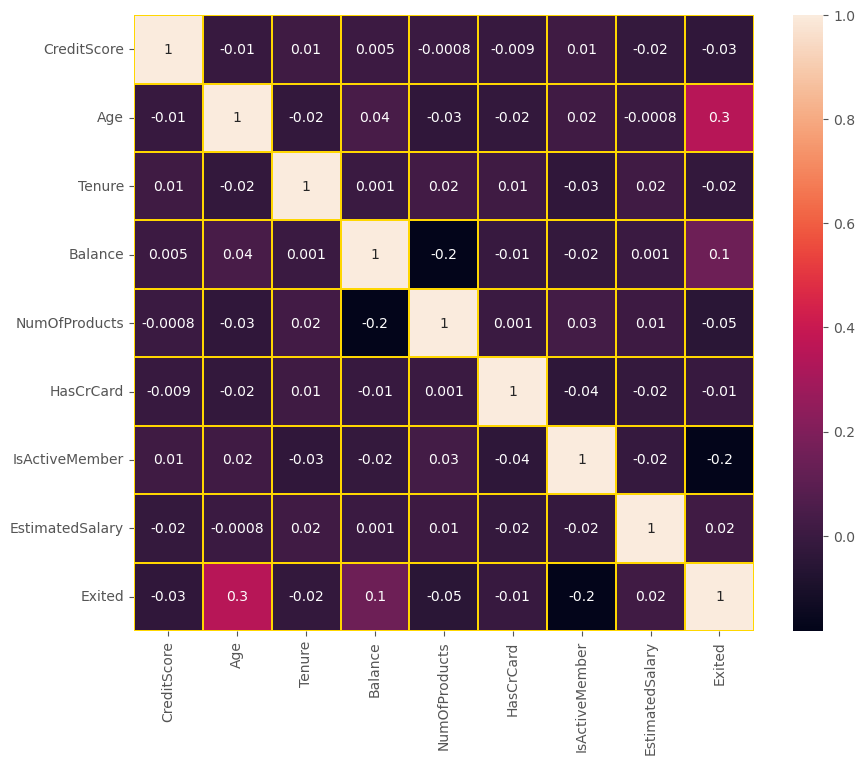

In [16]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,8))
sb.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

## Strorytelling - Visualization

Geography
0    5177
1    2532
2    3474
Name: HasCrCard, dtype: int64


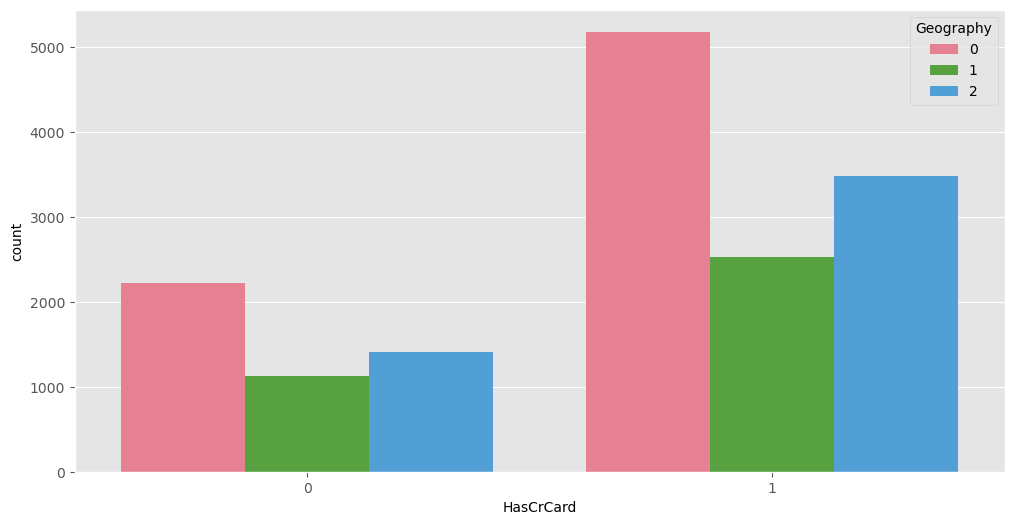

In [17]:
plt.figure(figsize = (12,6)) 
sb.countplot(x="HasCrCard",hue = "Geography", data=df, palette="husl");
print(df.groupby('Geography')["HasCrCard"].sum())

Geography
0    3188
1    1589
2    3186
Name: Exited, dtype: int64


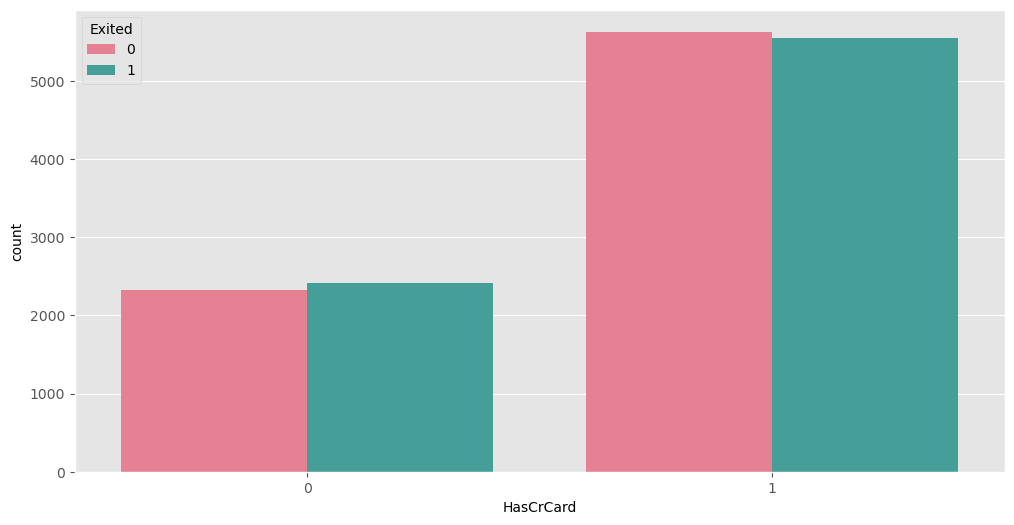

In [18]:
plt.figure(figsize = (12,6)) 
sb.countplot(x="HasCrCard",hue = "Exited", data=df, palette="husl");
print(df.groupby('Geography')["Exited"].sum())

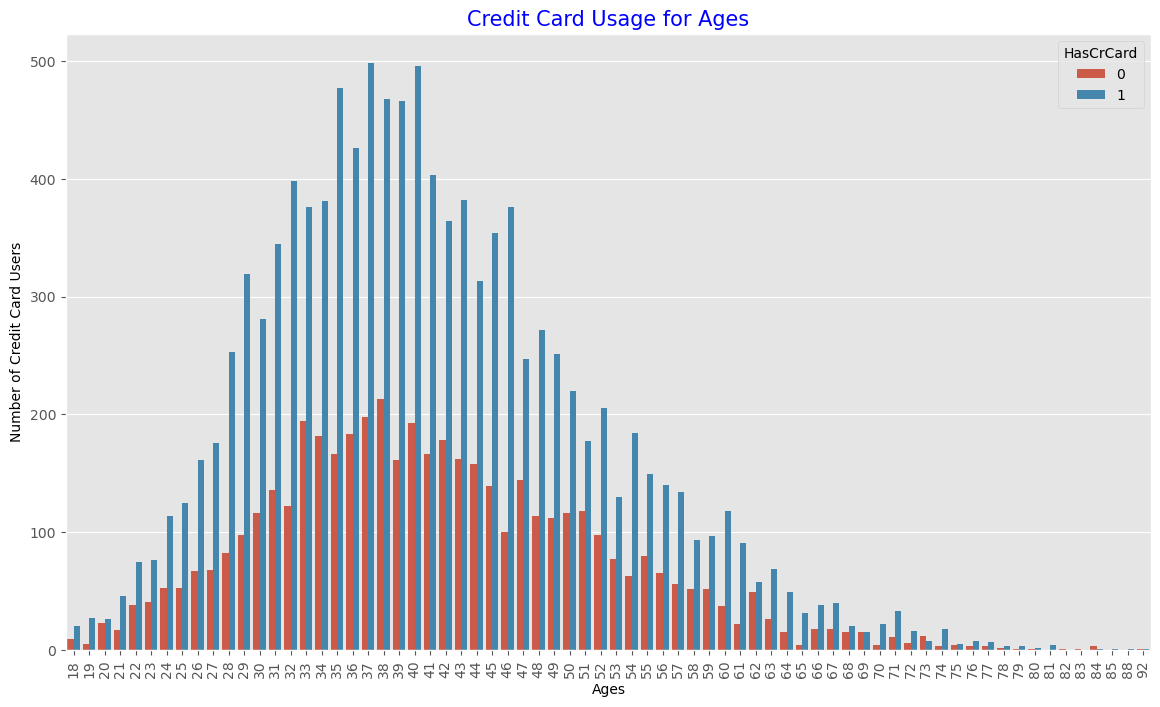

In [19]:
plt.figure(figsize = (14,8)) 
plt.xticks(rotation=90)
plt.title('Credit Card Usage for Ages',color = 'blue',fontsize=15)
sb.countplot(x=df["Age"],hue = 'HasCrCard',data=df);
plt.xlabel('Ages')
plt.ylabel('Number of Credit Card Users');

In [20]:
age_group_data = [None] * len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Young'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Young-Adults'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Adults'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Elderly-Adults'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Old'
    else:
        age_group_data[i] = 'Very-Old'

df['age_group'] = age_group_data

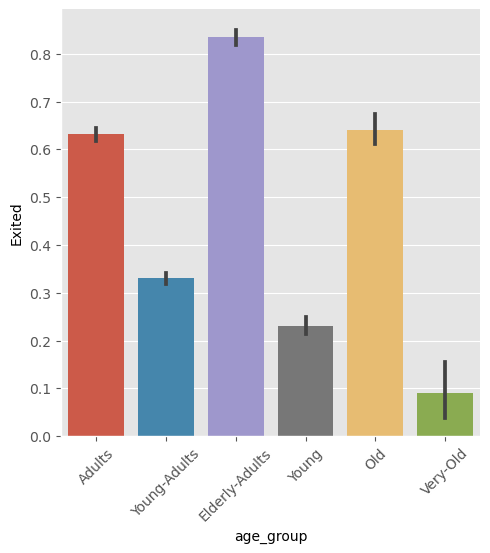

In [21]:
g = sb.catplot(x = "age_group", y = "Exited", data = df, kind = "bar")
plt.xticks(rotation=45)
g.set_ylabels("Exited")
plt.show()

## Prepare Data for Machine learning

In [22]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_group'],
      dtype='object')

In [23]:
train_column = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
x = np.asanyarray(df[train_column])
y = np.asanyarray(df['Exited'])

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

## Train your model

In [26]:
# !pip install xgboost

In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid
xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

# Create the XGBoost classifier
classifier = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(classifier, xgb_params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

[01:39:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[01:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[01:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[01:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[01:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

In [28]:


xgbm_cv = XGBClassifier(learning_rate=0.5,
                       max_depth=4,
                       min_samples_split=1,
                       n_estimators=200,
                       subsample=0.8,random_state=42)
xgbm_cv.fit(x_train,y_train)



[02:02:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_split=1, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

## Test the model and show the metrics

In [29]:
from sklearn.metrics import accuracy_score

temp_predict_1 = xgbm_cv.predict(x_train)
print('accuray of train : ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('accuray of test : ', accuracy_score(y_test, temp_predict_2))

accuray of train :  0.9613029827315541
accuray of test :  0.9011299435028248


In [30]:
from sklearn.metrics import recall_score

temp_predict_1 = xgbm_cv.predict(x_train)
print('recall_score of train : ', recall_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('recall_score of test : ', recall_score(y_test, temp_predict_2))

recall_score of train :  0.9729044525431786
recall_score of test :  0.9334140435835351


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = xgbm_cv.predict(x_test)

# F1-score
print(f'f1_score for reall y and prediction y : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = xgbm_cv.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

f1_score for reall y and prediction y : 0.9073256840247131
------------------------------
confusion matrix for reall y and prediction y : 
[[1329  205]
 [ 110 1542]]
------------------------------
Accuracy Score: 0.9011299435028248
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1534
           1       0.88      0.93      0.91      1652

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

------------------------------
AUC:  0.9555881851558381
------------------------------
Precision: 0.9031070040450562
------------------------------
Recall: 0.8998882473458745
------------------------------


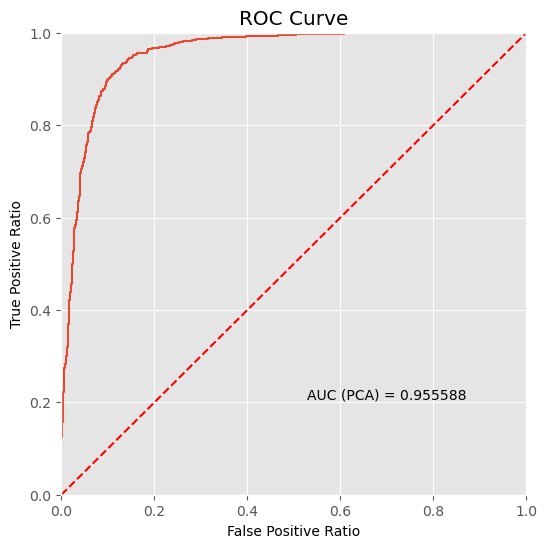

In [32]:


xgb_roc_auc = roc_auc_score(y_test,xgbm_cv.predict(x_test))

fpr, tpr, tresholds = roc_curve(y_test,xgbm_cv.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%xgb_roc_auc)

auc = roc_auc_score(y_test, y_prob)
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')

plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');



<Axes: title={'center': 'XGBoost Classification'}>

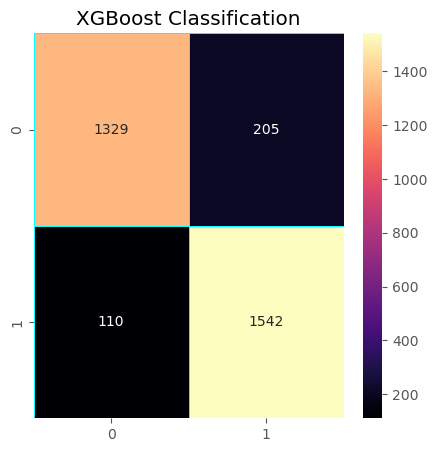

In [33]:
from sklearn.metrics import confusion_matrix
xgbm_cm = confusion_matrix(y_test,y_prediction)


fig = plt.figure(figsize=(5,5))
ax8 = fig.add_subplot(1, 1, 1)
ax8.set_title('XGBoost Classification')

sb.heatmap(data=xgbm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax8, cmap='magma')

## Save your final model

In [34]:
from joblib import dump
dump(xgbm_cv, 'models_trained\ xgb_model.pkl')

['models_trained\\ xgb_model.pkl']

## Send us the Result (Maktabkhoone)